In [1]:
#%pip install torch torchvision

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [3]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [4]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [5]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [7]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [8]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [9]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [10]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [11]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [12]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [13]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [14]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:15,  7.41it/s]                                                        


Epoch 1 of 100
Generator loss: 1.27296769, Discriminator loss: 1.06661551


118it [00:17,  6.74it/s]                                                        


Epoch 2 of 100
Generator loss: 2.99798085, Discriminator loss: 0.92975254


118it [00:17,  6.65it/s]                                                        


Epoch 3 of 100
Generator loss: 1.84994813, Discriminator loss: 1.10855055


118it [00:17,  6.56it/s]                                                        


Epoch 4 of 100
Generator loss: 2.18855312, Discriminator loss: 1.16491878


118it [00:17,  6.58it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


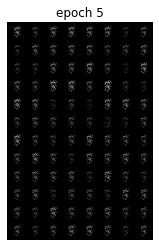

Epoch 5 of 100
Generator loss: 2.23744543, Discriminator loss: 1.24899162


118it [00:17,  6.71it/s]                                                        


Epoch 6 of 100
Generator loss: 2.51707722, Discriminator loss: 1.17591489


118it [00:17,  6.82it/s]                                                        


Epoch 7 of 100
Generator loss: 1.45934224, Discriminator loss: 1.13548611


118it [00:16,  6.98it/s]                                                        


Epoch 8 of 100
Generator loss: 0.85388876, Discriminator loss: 1.25088081


118it [00:17,  6.58it/s]                                                        


Epoch 9 of 100
Generator loss: 1.17470366, Discriminator loss: 1.23362447


118it [00:18,  6.21it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


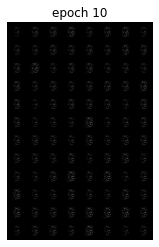

Epoch 10 of 100
Generator loss: 1.76114458, Discriminator loss: 1.17250894


118it [00:17,  6.56it/s]                                                        


Epoch 11 of 100
Generator loss: 1.35736861, Discriminator loss: 1.20056354


118it [00:18,  6.47it/s]                                                        


Epoch 12 of 100
Generator loss: 1.36598252, Discriminator loss: 1.03782839


118it [00:18,  6.39it/s]                                                        


Epoch 13 of 100
Generator loss: 1.66407407, Discriminator loss: 1.04789577


118it [00:18,  6.53it/s]                                                        


Epoch 14 of 100
Generator loss: 1.76145670, Discriminator loss: 1.02733331


118it [00:18,  6.44it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


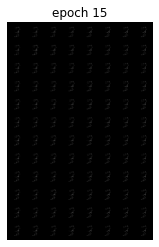

Epoch 15 of 100
Generator loss: 1.37951613, Discriminator loss: 1.22168268


118it [00:18,  6.54it/s]                                                        


Epoch 16 of 100
Generator loss: 1.47018075, Discriminator loss: 1.02879547


118it [00:18,  6.46it/s]                                                        


Epoch 17 of 100
Generator loss: 1.77905635, Discriminator loss: 1.03738482


118it [00:18,  6.47it/s]                                                        


Epoch 18 of 100
Generator loss: 2.00931816, Discriminator loss: 1.08922072


118it [00:18,  6.48it/s]                                                        


Epoch 19 of 100
Generator loss: 2.25390379, Discriminator loss: 1.06428136


118it [00:18,  6.34it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


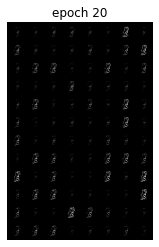

Epoch 20 of 100
Generator loss: 3.42472503, Discriminator loss: 1.52590846


118it [00:18,  6.31it/s]                                                        


Epoch 21 of 100
Generator loss: 2.19266225, Discriminator loss: 0.82726249


118it [00:20,  5.81it/s]                                                        


Epoch 22 of 100
Generator loss: 1.67344183, Discriminator loss: 0.90459337


118it [00:22,  5.34it/s]                                                        


Epoch 23 of 100
Generator loss: 1.58347386, Discriminator loss: 0.98909765


118it [00:22,  5.27it/s]                                                        


Epoch 24 of 100
Generator loss: 1.91701190, Discriminator loss: 0.78249330


118it [00:21,  5.57it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


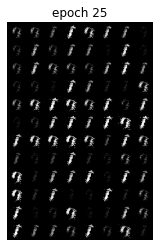

Epoch 25 of 100
Generator loss: 2.49310161, Discriminator loss: 0.73529673


118it [00:20,  5.72it/s]                                                        


Epoch 26 of 100
Generator loss: 2.52861942, Discriminator loss: 0.63210018


118it [00:19,  5.99it/s]                                                        


Epoch 27 of 100
Generator loss: 2.57523646, Discriminator loss: 0.60465940


118it [00:19,  6.16it/s]                                                        


Epoch 28 of 100
Generator loss: 2.64206692, Discriminator loss: 0.50286708


118it [00:20,  5.62it/s]                                                        


Epoch 29 of 100
Generator loss: 2.58271054, Discriminator loss: 0.59119317


118it [00:20,  5.85it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


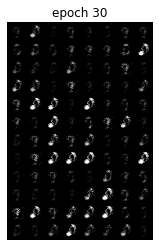

Epoch 30 of 100
Generator loss: 2.68415184, Discriminator loss: 0.59323854


118it [00:18,  6.22it/s]                                                        


Epoch 31 of 100
Generator loss: 2.89391435, Discriminator loss: 0.60442095


118it [00:18,  6.26it/s]                                                        


Epoch 32 of 100
Generator loss: 2.89348753, Discriminator loss: 0.60162821


118it [00:19,  6.17it/s]                                                        


Epoch 33 of 100
Generator loss: 2.88630470, Discriminator loss: 0.62057912


118it [00:21,  5.53it/s]                                                        


Epoch 34 of 100
Generator loss: 2.66735826, Discriminator loss: 0.60874590


118it [00:22,  5.30it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


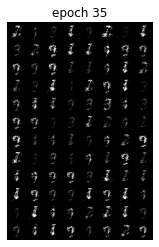

Epoch 35 of 100
Generator loss: 2.79734210, Discriminator loss: 0.50173056


118it [00:20,  5.75it/s]                                                        


Epoch 36 of 100
Generator loss: 3.32520367, Discriminator loss: 0.63609408


118it [00:20,  5.65it/s]                                                        


Epoch 37 of 100
Generator loss: 2.98069001, Discriminator loss: 0.49092500


118it [00:22,  5.36it/s]                                                        


Epoch 38 of 100
Generator loss: 3.30119351, Discriminator loss: 0.52901605


118it [00:22,  5.20it/s]                                                        


Epoch 39 of 100
Generator loss: 3.05717294, Discriminator loss: 0.46973856


118it [00:22,  5.20it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


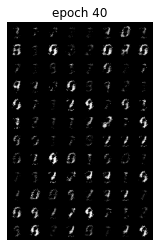

Epoch 40 of 100
Generator loss: 2.72243352, Discriminator loss: 0.63211542


118it [00:21,  5.61it/s]                                                        


Epoch 41 of 100
Generator loss: 3.09658418, Discriminator loss: 0.56268157


118it [00:19,  5.98it/s]                                                        


Epoch 42 of 100
Generator loss: 2.97364881, Discriminator loss: 0.68836754


118it [00:19,  6.02it/s]                                                        


Epoch 43 of 100
Generator loss: 2.70105023, Discriminator loss: 0.54435231


118it [00:19,  6.02it/s]                                                        


Epoch 44 of 100
Generator loss: 3.15042145, Discriminator loss: 0.41885735


118it [00:19,  5.96it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


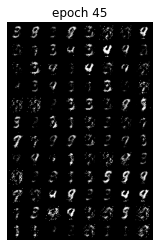

Epoch 45 of 100
Generator loss: 3.00801612, Discriminator loss: 0.47973794


118it [00:19,  6.03it/s]                                                        


Epoch 46 of 100
Generator loss: 2.77882541, Discriminator loss: 0.62080154


118it [00:19,  6.05it/s]                                                        


Epoch 47 of 100
Generator loss: 2.57467393, Discriminator loss: 0.55433061


118it [00:19,  5.98it/s]                                                        


Epoch 48 of 100
Generator loss: 2.95480438, Discriminator loss: 0.44948546


118it [00:20,  5.63it/s]                                                        


Epoch 49 of 100
Generator loss: 3.01156438, Discriminator loss: 0.53043971


118it [00:19,  5.91it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


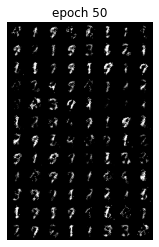

Epoch 50 of 100
Generator loss: 2.86353083, Discriminator loss: 0.52884823


118it [00:19,  6.18it/s]                                                        


Epoch 51 of 100
Generator loss: 2.93424124, Discriminator loss: 0.54293449


118it [00:19,  6.02it/s]                                                        


Epoch 52 of 100
Generator loss: 2.80791262, Discriminator loss: 0.52344771


118it [00:19,  6.06it/s]                                                        


Epoch 53 of 100
Generator loss: 3.00625560, Discriminator loss: 0.47167777


118it [00:19,  6.01it/s]                                                        


Epoch 54 of 100
Generator loss: 2.95813857, Discriminator loss: 0.49903920


118it [00:19,  6.00it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


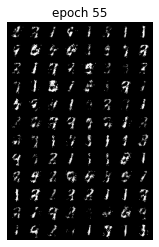

Epoch 55 of 100
Generator loss: 3.11997595, Discriminator loss: 0.48221622


118it [00:19,  6.07it/s]                                                        


Epoch 56 of 100
Generator loss: 3.17176421, Discriminator loss: 0.47439664


118it [00:19,  5.99it/s]                                                        


Epoch 57 of 100
Generator loss: 3.09266387, Discriminator loss: 0.48821731


118it [00:19,  6.02it/s]                                                        


Epoch 58 of 100
Generator loss: 2.98272044, Discriminator loss: 0.52151826


118it [00:20,  5.84it/s]                                                        


Epoch 59 of 100
Generator loss: 2.76072529, Discriminator loss: 0.61638359


118it [00:19,  5.92it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


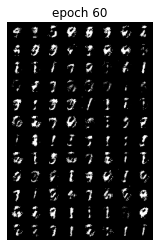

Epoch 60 of 100
Generator loss: 2.85009179, Discriminator loss: 0.59628681


118it [00:20,  5.86it/s]                                                        


Epoch 61 of 100
Generator loss: 2.66838897, Discriminator loss: 0.60482512


118it [00:19,  6.09it/s]                                                        


Epoch 62 of 100
Generator loss: 2.60283402, Discriminator loss: 0.59095884


118it [00:19,  6.03it/s]                                                        


Epoch 63 of 100
Generator loss: 2.59004071, Discriminator loss: 0.63496441


118it [00:19,  6.02it/s]                                                        


Epoch 64 of 100
Generator loss: 2.60221962, Discriminator loss: 0.58161386


118it [00:19,  5.91it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


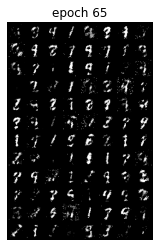

Epoch 65 of 100
Generator loss: 2.61941427, Discriminator loss: 0.57552043


118it [00:20,  5.69it/s]                                                        


Epoch 66 of 100
Generator loss: 2.75993891, Discriminator loss: 0.51742158


118it [00:20,  5.75it/s]                                                        


Epoch 67 of 100
Generator loss: 2.56612847, Discriminator loss: 0.58062428


118it [00:19,  5.93it/s]                                                        


Epoch 68 of 100
Generator loss: 2.74291541, Discriminator loss: 0.54854925


118it [00:23,  5.03it/s]                                                        


Epoch 69 of 100
Generator loss: 2.68402936, Discriminator loss: 0.56039463


118it [00:27,  4.36it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


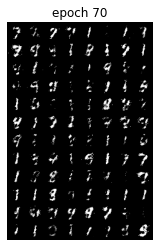

Epoch 70 of 100
Generator loss: 2.72066322, Discriminator loss: 0.59182231


118it [00:24,  4.80it/s]                                                        


Epoch 71 of 100
Generator loss: 2.67199088, Discriminator loss: 0.59687477


118it [00:23,  4.98it/s]                                                        


Epoch 72 of 100
Generator loss: 2.61744017, Discriminator loss: 0.58829293


118it [00:23,  5.02it/s]                                                        


Epoch 73 of 100
Generator loss: 2.47944553, Discriminator loss: 0.61764798


118it [00:21,  5.37it/s]                                                        


Epoch 74 of 100
Generator loss: 2.41098729, Discriminator loss: 0.59164365


118it [00:21,  5.40it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


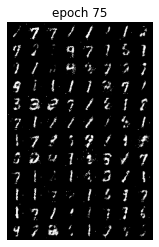

Epoch 75 of 100
Generator loss: 2.49207776, Discriminator loss: 0.59822922


118it [00:23,  5.10it/s]                                                        


Epoch 76 of 100
Generator loss: 2.48563474, Discriminator loss: 0.61538099


118it [00:23,  5.03it/s]                                                        


Epoch 77 of 100
Generator loss: 2.42367394, Discriminator loss: 0.61055928


118it [00:23,  5.08it/s]                                                        


Epoch 78 of 100
Generator loss: 2.28096185, Discriminator loss: 0.64687954


118it [00:23,  5.03it/s]                                                        


Epoch 79 of 100
Generator loss: 2.34995242, Discriminator loss: 0.63662873


118it [00:23,  4.97it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


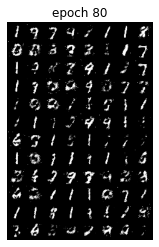

Epoch 80 of 100
Generator loss: 2.46831966, Discriminator loss: 0.63374328


118it [00:24,  4.80it/s]                                                        


Epoch 81 of 100
Generator loss: 2.25567285, Discriminator loss: 0.67118003


118it [00:22,  5.30it/s]                                                        


Epoch 82 of 100
Generator loss: 2.34738175, Discriminator loss: 0.66718213


118it [00:22,  5.25it/s]                                                        


Epoch 83 of 100
Generator loss: 2.24385922, Discriminator loss: 0.71468555


118it [00:23,  5.06it/s]                                                        


Epoch 84 of 100
Generator loss: 2.26828075, Discriminator loss: 0.66787089


118it [00:23,  4.96it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


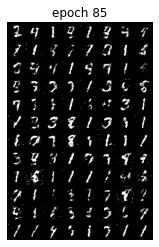

Epoch 85 of 100
Generator loss: 2.30885725, Discriminator loss: 0.68366937


118it [00:21,  5.60it/s]                                                        


Epoch 86 of 100
Generator loss: 2.17093749, Discriminator loss: 0.72077774


118it [00:19,  6.07it/s]                                                        


Epoch 87 of 100
Generator loss: 2.27540470, Discriminator loss: 0.69277490


118it [00:19,  6.05it/s]                                                        


Epoch 88 of 100
Generator loss: 2.19306760, Discriminator loss: 0.69508714


118it [00:20,  5.89it/s]                                                        


Epoch 89 of 100
Generator loss: 2.19414154, Discriminator loss: 0.70479533


118it [00:19,  6.02it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


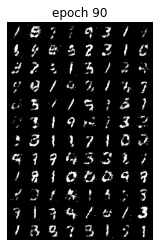

Epoch 90 of 100
Generator loss: 2.16911201, Discriminator loss: 0.73711270


118it [00:19,  6.08it/s]                                                        


Epoch 91 of 100
Generator loss: 2.03438301, Discriminator loss: 0.74845795


118it [00:19,  5.91it/s]                                                        


Epoch 92 of 100
Generator loss: 1.99882899, Discriminator loss: 0.76449005


118it [00:20,  5.83it/s]                                                        


Epoch 93 of 100
Generator loss: 2.07694481, Discriminator loss: 0.74264959


118it [00:19,  6.03it/s]                                                        


Epoch 94 of 100
Generator loss: 2.07332809, Discriminator loss: 0.75708103


118it [00:19,  6.06it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


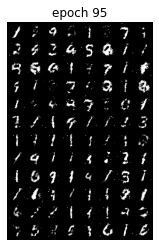

Epoch 95 of 100
Generator loss: 2.10554177, Discriminator loss: 0.72966874


118it [00:21,  5.51it/s]                                                        


Epoch 96 of 100
Generator loss: 2.09727793, Discriminator loss: 0.76328333


118it [00:24,  4.87it/s]                                                        


Epoch 97 of 100
Generator loss: 1.92611049, Discriminator loss: 0.78990049


118it [00:25,  4.71it/s]                                                        


Epoch 98 of 100
Generator loss: 1.89366243, Discriminator loss: 0.79204392


118it [00:23,  4.95it/s]                                                        


Epoch 99 of 100
Generator loss: 1.97055266, Discriminator loss: 0.79218942


118it [00:21,  5.42it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


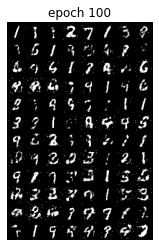

Epoch 100 of 100
Generator loss: 1.95917967, Discriminator loss: 0.81145524


In [17]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    output = output.view(-1, 1)
    return criterion(output, true_label)
    
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    output = output.view(-1, 1)
    return criterion(output, true_label)
    
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        
        real_label = label_real(b_size)
        fake_label = label_fake(b_size)
        
        discriminator.zero_grad()
        output = discriminator(image).view(-1)
        loss_d_real = discriminator_loss(output, real_label)
        loss_d_real.backward()
        
        noise = create_noise(b_size, nz)
        fake_data = generator(noise)
        output = discriminator(fake_data.detach()).view(-1)
        loss_d_fake = discriminator_loss(output, fake_label)
        loss_d_fake.backward()
        
        optim_d.step()
        loss_d += loss_d_real.item() + loss_d_fake.item()
        
        generator.zero_grad()
        output = discriminator(fake_data).view(-1)
        loss_g_real = generator_loss(output, real_label)
        loss_g_real.backward()
        
        optim_g.step()
        loss_g += loss_g_real.item()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [18]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [19]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

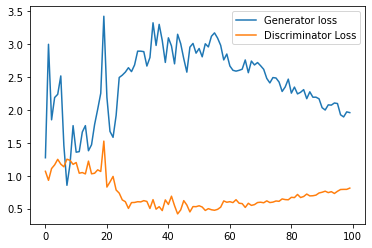

In [20]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')